## REI602M Machine Learning - Homework 5 (under construction!)
### Due: Sunday 17.2.2019

**Objectives**: Feature scaling, parameter selection, tree classifiers. 

**Name**: Emil Gauti Friðriksson, **email: ** egf3@hi.is, **collaborators:** (if any)

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope, taking care to locate the appropriate page numbers in the PDF document. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad).

1\. [Pre-processing and parameter tuning in a nonlinear SVM classifier, 30 points] The Statlog Satimage data set is an old benchmark in machine learning. It contains data from satellite images and the aim is to predict land type (red soil, cotton crop etc). There are 36 integer valued features and 6 classes. The file `sat.trn` contains 4435 training examples and `sat.tst` contains 2000 test examples. Your task is to obtain an SVM classifier which achieves high classification accuracy on this data set. Use Scikit-learn to carry out the tasks below.

i) [6 points] Evaluate the accuracy of an SVM with an RBF kernel (RBF-SVM) using the default values for $C$ and $\gamma$.

ii) [9 points] Scale the data prior to training an RBF-SVM (make sure to scale the test data accordingly, see lecture notes from week 2) and repeat the task from i).

iii) [12 points] Use grid search in combination with cross-validation on the (scaled) training set to identify good values of $C$ and $\gamma$. Retrain a classifier using the best parameter values on the whole training set and evaluate the accuracy of the resulting classifier. You should start with a coarse grid to identify a range of good values and then do another run with a finer grid.

iv) [3 point] Comment briefly on the importance of data scaling and model selection for nonlinear SVMs.

*Comments*:

1) At the time of publication (mid 90's) the best performing classifier was a k-nearest neighbor classifier using Euclidean distance which had an error rate of 9.4%. Description of the data set: https://archive.ics.uci.edu/ml/datasets/Statlog+(Landsat+Satellite)

2) Use `preprocessing.StandardScaler` for data scaling.

3) The procedure of selecting values of hyper-parameters such as $C$ and $\gamma$ is called *model selection*. *Grid search* refers to a parameter search where model performance is evaluated over a fixed set of parameter values. The parameter values are frequently logarithmically spaced. The performance is often evaluated using cross-validation or a separate vaidation set if that is available. The performance measure here is classifier accuracy, the fraction of correctly classified examples.

4) You can use the `GridSearchCV` class in scikit-learn. See sections 3.1 (cross-validation: evaluating estimator performance), 3.2 (tuning the hyper-parameters of an estimator) and the "Parameter estimation using grid search with cross-validation" example.

In [88]:
import numpy as np
#load data:
data_train = np.loadtxt('sat.trn')
data_test = np.loadtxt('sat.tst')
X_train = data_train[:,0:36]
y_train = data_train[:,36]
X_test = data_test[:,0:36]
y_test = data_test[:,36]
# i)
from sklearn.svm import SVC
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
testScore = rbf.score(X_test,y_test)
trainScore = rbf.score(X_train,y_train)
print('testScore: ',testScore)
print('trainScore: ',trainScore)

testScore:  0.2385
trainScore:  1.0


In [89]:
#ii) Skölum gögnin og prófum aftur
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Prófum með sköluðu gögnunum
rbf_sc = SVC(kernel='rbf')
rbf_sc.fit(X_train_sc,y_train)
testScore_sc = rbf_sc.score(X_test_sc,y_test)
trainScore_sc = rbf_sc.score(X_train_sc,y_train)
print('testScore: ',testScore_sc)
print('trainScore: ',trainScore_sc)



testScore:  0.8955
trainScore:  0.9095828635851184


In [90]:
#iii) [12 points] Use grid search in combination with cross-validation on the (scaled) training set to identify good values of  CC  and  γγ . 
#Retrain a classifier using the best parameter values on the whole training set and evaluate the accuracy of the resulting classifier. 
#You should start with a coarse grid to identify a range of good values and then do another run with a finer grid.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,2,10,100], 'gamma':[0.01,0.1,1,10]}
rbf_sc_cv = SVC(kernel='rbf')
clf = GridSearchCV(rbf_sc_cv, parameters, cv=5)
clf.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 10, 100], 'gamma': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
print('TrainScore: ',clf.score(X_train_sc,y_train))
print('testScore: ', clf.score(X_test_sc,y_test))

print('Bestu parametrar:',clf.best_params_)
print('Besta fit:', clf.best_estimator_)

TrainScore:  0.9490417136414881
testScore:  0.915
Bestu parametrar: {'C': 2, 'gamma': 0.1}
Besta fit: SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [92]:
#Athugum nálægt gildunum C=2 og gamma=0.1
parameters2 = {'C':[1.5,1.8,2,2.3,2.5], 'gamma':[0.05,0.1,0.5]}
clf2 = GridSearchCV(rbf_sc_cv,parameters2,cv=5)
clf2.fit(X_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1.5, 1.8, 2, 2.3, 2.5], 'gamma': [0.05, 0.1, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
print('TrainScore: ',clf2.score(X_train_sc,y_train))
print('testScore: ', clf2.score(X_test_sc,y_test))

print('Bestu parametrar:',clf2.best_params_)
print('Besta fit:', clf2.best_estimator_)

TrainScore:  0.943630214205186
testScore:  0.9155
Bestu parametrar: {'C': 1.5, 'gamma': 0.1}
Besta fit: SVC(C=1.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


**iv)** Eins og sjá má hjá okkur hér er að skölun gagna hefur gríðarlega mikil áhrif á hve nákvæmt módelið okkar er, við fórum úr testScore=0.2385 í testScore=0.8955 bara við það eitt að skala gögnin okkar. Síðan fengum við enn betri nákvæmni þegar við völdum betri gildi á parametrana okkar. við fórum frá testScore=0.8955 yfir í testScore=0.9155 við það að finna gott gildi á $C$ og $\gamma$ ($C=1.5$ og $\gamma = 0.1$)

2\. [Feature selection and chemical informatics, 30 points] Quantitative Structure - Activity Relationship (QSAR) models relate the activity of chemical compounds to their structural properties. The activity can e.g. represent the potency of a drug or its toxicity. The structural properties may contain basic information such as i) the fraction of carbon atoms in the compound, ii) the spatial arrangement of atoms in the compound and iii) quantities computed from quantum mechanical simulations (*ab-initio* calculations).

The QSAR biodegradation Data Set `biodeg.csv` contains 41 molecular descriptors for two groups of compounds, those that are readily biodegradable (RB) and those that are not (NRB). The data set has 356 examples in the RB class and 699 in the NRB class, i.e. it is somewhat unbalanced.

a) [15 points] Obtain a Random forests classifier for predicting whether a given compound is readily biodegradable or not. Use a random 80/20 train/test set split for evaluting the performance of your classifier. Report the sensitivity and specificity of the classifier along with accuracy (see below).

b) [15 points] List the names of the 10 *most useful* features for the classification task. Retrain a Random forests classifier using only the 10 most useful features and report sensitivity, specificity and accuracy.

*Comments*:

1) A description of the data set can be found here: https://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation

2) A correctly predicted RB example is said to be a *true positive* and a correctly predicted NRB examples is said to be a *true negative*. When an NRB example is incorrectly predicted as RB it is a *false positive*. False negatives are defined analogously.

The *sensitivity* of a binary classifier is defined as TP/(TP+FN) and the *specificity* is defined as TN/(TN+FP) where TP is the number of true positives etc. These values are conveniently obtained from a confusion matrix.

3) Sidenote: Repeatedly retraining a classifier with smaller and smaller number of top features until the out-of-bag error starts to increase can cause overfitting.

In [94]:
#load data and split
from sklearn.model_selection import train_test_split
data = np.loadtxt('biodeg.csv',delimiter=';')

X = data[:,0:41]
y = data[:,41]
X_train, X_test, y_train, y_test = train_test_split(X,
                                y, test_size=0.20, random_state=42)

In [95]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
print('Train Score:',clf.score(X_train,y_train))
print('Test Score:',clf.score(X_test,y_test))

Train Score: 0.9869668246445498
Test Score: 0.8815165876777251


Model sensitivity: 0.7733333333333333
Model specificity: 0.9411764705882353


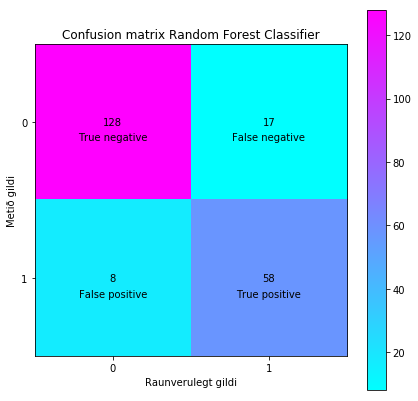

In [96]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test,clf.predict(X_test))
plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='cool')
plt.title('Confusion matrix Random Forest Classifier')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
blabb = ['True negative','False positive','False negative','True positive']
ind=0
for i in range(n):
    for j in range(p):        
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')
        plt.annotate(blabb[ind],xy=(i,j+0.1), horizontalalignment='center'
                     , verticalalignment='center')
        ind=ind+1
sens = cm[1,1]/(cm[1,1] + cm[1,0])
spec = cm[0,0]/(cm[0,0] + cm[0,1])

print('Model sensitivity:', sens)
print('Model specificity:', spec)

Þá sjáum við að *sensitivity* er $\frac{\text{TP}}{\text{TP+FN}} = 0.7733$ og *specificity* er $\frac{\text{TN}}{\text{TN+FP}} = 0.9411$

In [97]:
#b)List the names of the 10 most useful features for the classification task. Retrain a Random forests classifier using 
#only the 10 most useful features and report sensitivity, specificity and accuracy.


descriptors = open('descriptors.txt').read().splitlines()

#Byrjum á að finna áhrifamestu þætti
theta = clf.feature_importances_

abstheta = abs(theta)
#10 stærstu theta:
index10 = np.argsort(abstheta)[-10:]
max10_theta = theta[index10]

print('Nafn áhrifamestu þátta \n')
for ind in index10:
    print(descriptors[ind])




Nafn áhrifamestu þátta 

27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index) 
2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity 
37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average 
8) C%: Percentage of C atoms 
15) SM6_L: Spectral moment of order 6 from Laplace matrix 
12) SdssC: Sum of dssC E-states 
39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass 
1) SpMax_L: Leading eigenvalue from Laplace matrix 
36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass 
22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability 


Train Score(Top 10 features): 0.985781990521327
Test Score(Top 10 features): 0.8151658767772512
Model sensitivity: 0.6533333333333333
Model specificity: 0.9044117647058824


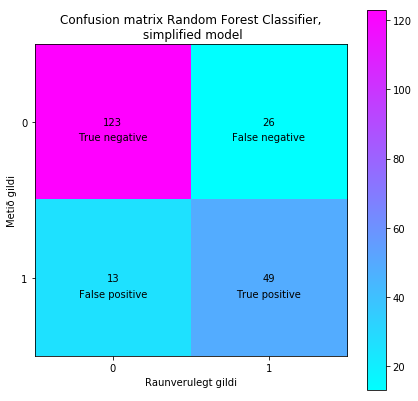

In [98]:
n=X_train.shape[0]
p=X_train.shape[1]
X_train_red = np.zeros((n,p))
for ind in index10:
    X_train_red[:,ind] = X_train[:,ind]
clf_red = RandomForestClassifier()
clf_red.fit(X_train_red,y_train)
print('Train Score(Top 10 features):',clf_red.score(X_train,y_train))
print('Test Score(Top 10 features):',clf_red.score(X_test,y_test))

#Confusion matrix
cm = metrics.confusion_matrix(y_test,clf_red.predict(X_test))
plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='cool')
plt.title('Confusion matrix Random Forest Classifier,\n simplified model')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
blabb = ['True negative','False positive','False negative','True positive']
ind=0
for i in range(n):
    for j in range(p):        
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')
        plt.annotate(blabb[ind],xy=(i,j+0.1), horizontalalignment='center'
                     , verticalalignment='center')
        ind=ind+1
        
sens = cm[1,1]/(cm[1,1] + cm[1,0])
spec = cm[0,0]/(cm[0,0] + cm[0,1])

print('Model sensitivity:', sens)
print('Model specificity:', spec)

Þá sjáum við að *sensitivity* er $\frac{\text{TP}}{\text{TP+FN}} =0.6533$ og *specificity* er $\frac{\text{TN}}{\text{TN+FP}} = 0.9044$

3\. [40 points] In this problem you will construct a predictive model for Telemarketing. The data comes from a telemarketing campaign in Portugal where the goal was to get clients to subscribe to long-term savings deposits. The predictive model is to be used to identify customers that are likely to subscribe, based on personal information, economic indicators, whether the client has been contacted before etc. This should make the campaign more effective and reduce marketing costs.

The data is in file `bank-additional-full.csv` with a brief description in `bank-additional-names.txt`. The data contains a mixture of continuous and categorical features, with categorical data in text format. Some preprocessing is therefore needed before you can use it with scikit-learn algorithms.

The data is time ordered which means that randomly splitting it into training and test sets amounts to peeking into the future and will provide too optimistic estimates of model performance. This is therefore not a suitable evaluation strategy. In situations like this, one uses historical data to train a model and predicts data from the current period. To simulate this scenario you will use the most recent (last) 4000 samples for testing and everything else for training.

Train a Random Forests or Extra Trees classifier on the training set and evaluate it on the test set using an appropriate performance metric. The selection of metric should take into account whether the classes are balanced or not, as well as the goal of the prediction task. Do you think your model would be useful in practice? Why or why not?

*Comments*:

1) This is a somewhat open ended problem. There is no single correct answer.

2) The data set is described in some detail here:
https://archive.ics.uci.edu/ml/datasets/bank+marketing
and a previous attempt at predictive modeling in: https://www.sciencedirect.com/science/article/pii/S016792361400061X

3) To convert the data into a matrix format suitable for scikit-learn, it is probably easiest to use the Python Data Analysis Library (pandas) package. You load the data using

`import pandas as pd
bank_df=pd.read_csv('bank-additional-full.csv',sep=';')`

You can iterate over the features using e.g.

`for col in bank_df.columns:
    if bank_df[col].dtype == object:
        print("Categorical: ",col)
    else:
        print("Numerical: ", col)`

The output variable (`y`) is 1 if a customer subscribes and 0 otherwise. 

Start by using only the numerical data. Then add the categorical data gradually. More data does not always help.

The simplest conversion of categories to integers is called label encoding. In pandas:

`bank_df['y']=bank_df['y'].astype('category')
bank_df['y']=bank_df['y'].cat.codes
y=bank_df['y'].values
bank_df=bank_df.drop('y',axis=1) # Remove output variable`

or using scikit-learn instead:

`from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(bank_df['y'])[:,0]`

Label encoding of a feature assumes that the feature values have a natural ordering (are ordinal). This has some drawbacks as detailed in the lecture notes and one-hot-encoding is generally preferred. This is most conveniently done by using `pd.get_dummies` with `drop_first=True`. For this particular data set, direct application of one-hot-encoding does not necessarily improve performance.

4) In addition to `sklearn.metrics.confusion_matrix` which can be used to derive sensitivity, specificity and accuracy, the `sklearn.metrics.classification_report` class provides performance metrics called precision recall and F-score (see Wikipedia for details).

Byrjum á að nota einungis þá dálka sem innihalda tölur. Ég ákvað að nota bæði RandomForestClassifier og ExtraTreesClassifier til að bera saman ásamt því að ég athuga nákvæmnina 100 sinnum og skila svo meðal-nákvæmninni.

In [99]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
bank_df=pd.read_csv('bank-additional-full.csv',sep=';')

y = bank_df['y']
for col in bank_df.columns: 
    if bank_df[col].dtype == object:  
        bank_df = bank_df.drop(columns=[col])
    
d = {'no':0,'yes':1}
y = y.replace(d)

X_train = bank_df[0:-4000]
y_train = y[0:-4000]
X_test = bank_df[-4000:]
y_test = y[-4000:]


maxiter=100
clf_score=np.zeros(maxiter)
trees_score=np.zeros(maxiter)
trees_sc_score=np.zeros(maxiter)
for i in range(maxiter):
    clf = RandomForestClassifier()    
    trees = ExtraTreesClassifier()
    #Fit the training data
    clf.fit(X_train,y_train)
    trees.fit(X_train,y_train)
    #check the scores
    clf_score[i] = clf.score(X_test,y_test)
    trees_score[i] = trees.score(X_test,y_test)
    

print('Mean random forest test score:',np.mean(clf_score))

print('Mean extra trees test score:', np.mean(trees_score))

Mean random forest test score: 0.618015
Mean extra trees test score: 0.6332425


In [104]:
print('hlutfall fólks í training data sem skráði sig:',
      np.round(sum(y_train)/len(y_train),5))
print('hlutfall fólks í testing data sem skráði sig: ',
      np.round(sum(y_test)/len(y_test),5))

hlutfall fólks í training data sem skráði sig: 0.07489
hlutfall fólks í testing data sem skráði sig:  0.46375


Við sjáum nú að training data og testing data eru biased á þann hátt að fólkið í testing data er mikið duglegra að skrá sig. Þetta getur stuðlað að því að við fáum þó nokkuð mörg false negatives í testing data sem er mjög slæmt. Þetta þýðir að ef það er einungis hringt í það fólk sem líkanið segir að muni kaupa að þá eru margir viðskiptavinir sem myndu kaupa skildir útundan.
Við viljum þá hámarka *sensitivity*

Model sensitivity: 0.24797843665768193
Model specificity: 0.924941724941725


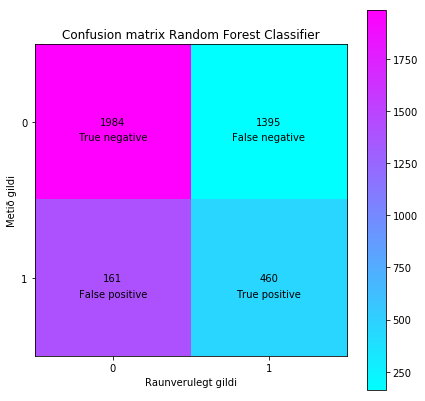

In [101]:
#Confusion matrix á síðustu ítrun, gefur ágætis mynd.
cm = metrics.confusion_matrix(y_test,clf.predict(X_test))
plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='cool')
plt.title('Confusion matrix Random Forest Classifier')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
blabb = ['True negative','False positive','False negative','True positive']
ind=0
for i in range(n):
    for j in range(p):        
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')
        plt.annotate(blabb[ind],xy=(i,j+0.1), horizontalalignment='center'
                     , verticalalignment='center')
        ind=ind+1
        
sens = cm[1,1]/(cm[1,1] + cm[1,0])
spec = cm[0,0]/(cm[0,0] + cm[0,1])

print('Model sensitivity:', sens)
print('Model specificity:', spec)

Fáum mjög lágt *sensitivity* sem gefur til kynna að þetta sé ekki góð leið til að meta hvort eigi að hringja í fólk

In [105]:
#Bætum nú við öllum dálkum sem voru ekki notaðir í fyrri hluta:

bank_df=pd.read_csv('bank-additional-full.csv',sep=';')


bank_df = pd.get_dummies(bank_df, 
                         columns=["job","marital","education","default","housing"])
bank_df = pd.get_dummies(bank_df, columns=["loan","contact","month","day_of_week"])
bank_df = pd.get_dummies(bank_df, columns=["poutcome"])


y = bank_df['y']
bank_df = bank_df.drop(columns=["y"])


d = {'no':0,'yes':1}
y = y.replace(d)


X_train = bank_df[0:-4000]
y_train = y[0:-4000]
X_test = bank_df[-4000:]
y_test = y[-4000:]

maxiter=100
trees_ex_score=np.zeros(maxiter)
for i in range(maxiter):
    trees_ex = ExtraTreesClassifier()
    #Fit the training data
    trees_ex.fit(X_train,y_train)
    #check the scores    
    trees_ex_score[i] = trees_ex.score(X_test,y_test)

print('Mean extra trees test score:(one-hot-encoding)',
      np.round(np.mean(trees_ex_score),5))



Mean extra trees test score:(one-hot-encoding) 0.58363


Model sensitivity: 0.15525606469002695
Model specificity: 0.9342657342657342


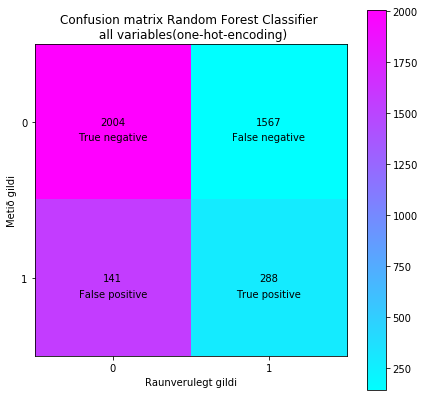

In [103]:
#Confusion matrix á síðustu ítrun, gefur ágætis mynd.
cm = metrics.confusion_matrix(y_test,trees_ex.predict(X_test))
plt.figure(figsize=(7,7))
plt.imshow(cm, cmap='cool')
plt.title('Confusion matrix Random Forest Classifier \n 
          all variables(one-hot-encoding)')
plt.xlabel('Raunverulegt gildi')
plt.ylabel('Metið gildi')
plt.xticks([0,1])
plt.yticks([0,1])
plt.colorbar()
n = cm.shape[0]
p = cm.shape[1]
blabb = ['True negative','False positive','False negative','True positive']
ind=0
for i in range(n):
    for j in range(p):        
        plt.annotate(str(cm[i,j]),xy=(i,j), 
                     horizontalalignment='center', verticalalignment='center')
        plt.annotate(blabb[ind],xy=(i,j+0.1), horizontalalignment='center'
                     , verticalalignment='center')
        ind=ind+1
        
sens = cm[1,1]/(cm[1,1] + cm[1,0])
spec = cm[0,0]/(cm[0,0] + cm[0,1])

print('Model sensitivity:', sens)
print('Model specificity:', spec)

Þegar öllum gögnunum er bætt við fáum við enn verri niðurstöður heldur en þegar einungis tölulegu gögnin voru notuð. Fáum enn of mörg False negatives sem er mjög slæmt. 